In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import sys, traceback
import seaborn as sns

In [64]:
def get_data_from_consumption(db_path, table_name):
    try:
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()
        print("successfully connected to database")
            
    except:
        print("Error in connecting database!")
        print("-"*60)
        traceback.print_exc(file=sys.stdout)
        print("-"*60)
    df = pd.read_sql('SELECT * FROM {}'.format(table_name), conn)
    conn.close()
    return df

In [65]:
df = get_data_from_consumption("../../database/data.db", "CONSUMPTION")
df.head()

successfully connected to database


,unique_data,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,RawTimeStamp,ConsumptionTimeStamp
0,2549.026455,842,0,2.2,0,1,0,7,0.6,188,...,2549,9,7,19,0,0,1,1,2023-05-29 12:46:43,2023-05-29 14:32:00
1,2631.455231,1021,1,0.5,1,0,1,53,0.7,136,...,2631,17,3,7,1,1,0,2,2023-05-29 12:46:43,2023-05-29 14:32:00
2,2603.736014,563,1,0.5,1,2,1,41,0.9,145,...,2603,11,2,9,1,1,0,2,2023-05-29 12:46:43,2023-05-29 14:32:00
3,2769.680851,615,1,2.5,0,0,0,10,0.8,131,...,2769,16,8,11,1,0,0,2,2023-05-29 12:46:43,2023-05-29 14:32:00
4,1411.996700,1821,1,1.2,0,13,1,44,0.6,141,...,1411,8,2,15,1,1,0,1,2023-05-29 12:46:43,2023-05-29 14:32:00


In [66]:
df = df.drop(["unique_data", "RawTimeStamp", "ConsumptionTimeStamp"], axis=1)
y_train = df["price_range"]

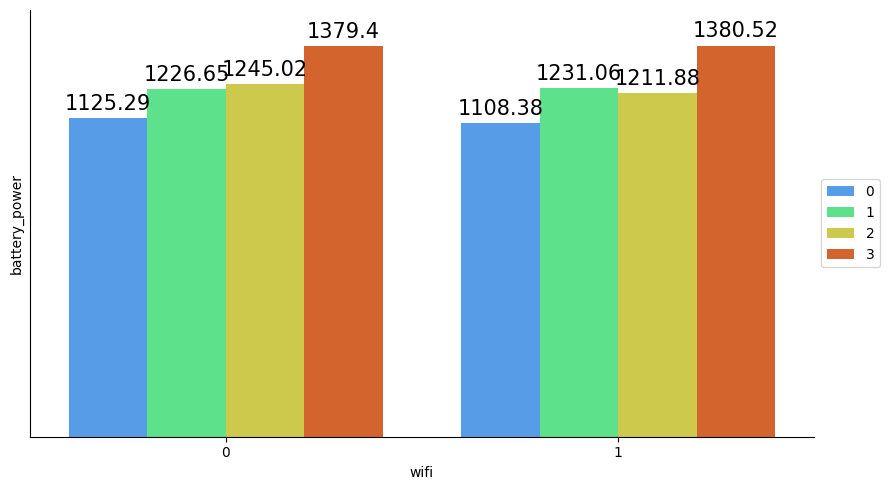

In [67]:
plt.figure(figsize = (9, 5))
ax = sns.barplot(x=df["wifi"], y=df["battery_power"], hue=y_train, data=df, errwidth=0, palette='turbo')
ax.tick_params(left=False, labelleft=False)
for bars_group in ax.containers:
    ax.bar_label(bars_group, padding=3, fontsize=15)
ax.legend(bbox_to_anchor=(1, .5), loc='center left')
# ax.margins(x=0.15) # optionally more space for the text
sns.despine()
plt.tight_layout()
plt.show()


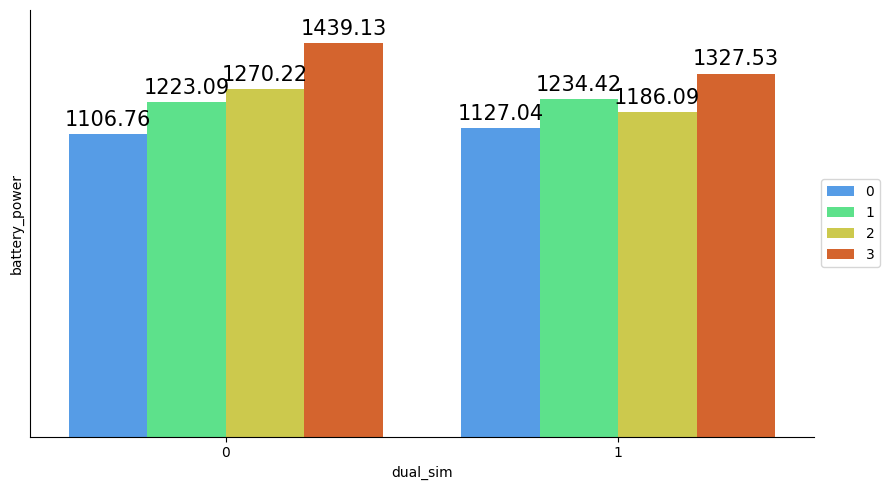

In [68]:
plt.figure(figsize = (9, 5))
ax = sns.barplot(x=df["dual_sim"], y=df["battery_power"], hue=y_train, data=df, errwidth=0, palette='turbo')
ax.tick_params(left=False, labelleft=False)
for bars_group in ax.containers:
    ax.bar_label(bars_group, padding=3, fontsize=15)
ax.legend(bbox_to_anchor=(1, .5), loc='center left')
# ax.margins(x=0.15) # optionally more space for the text
sns.despine()
plt.tight_layout()
plt.show()


<Axes: >

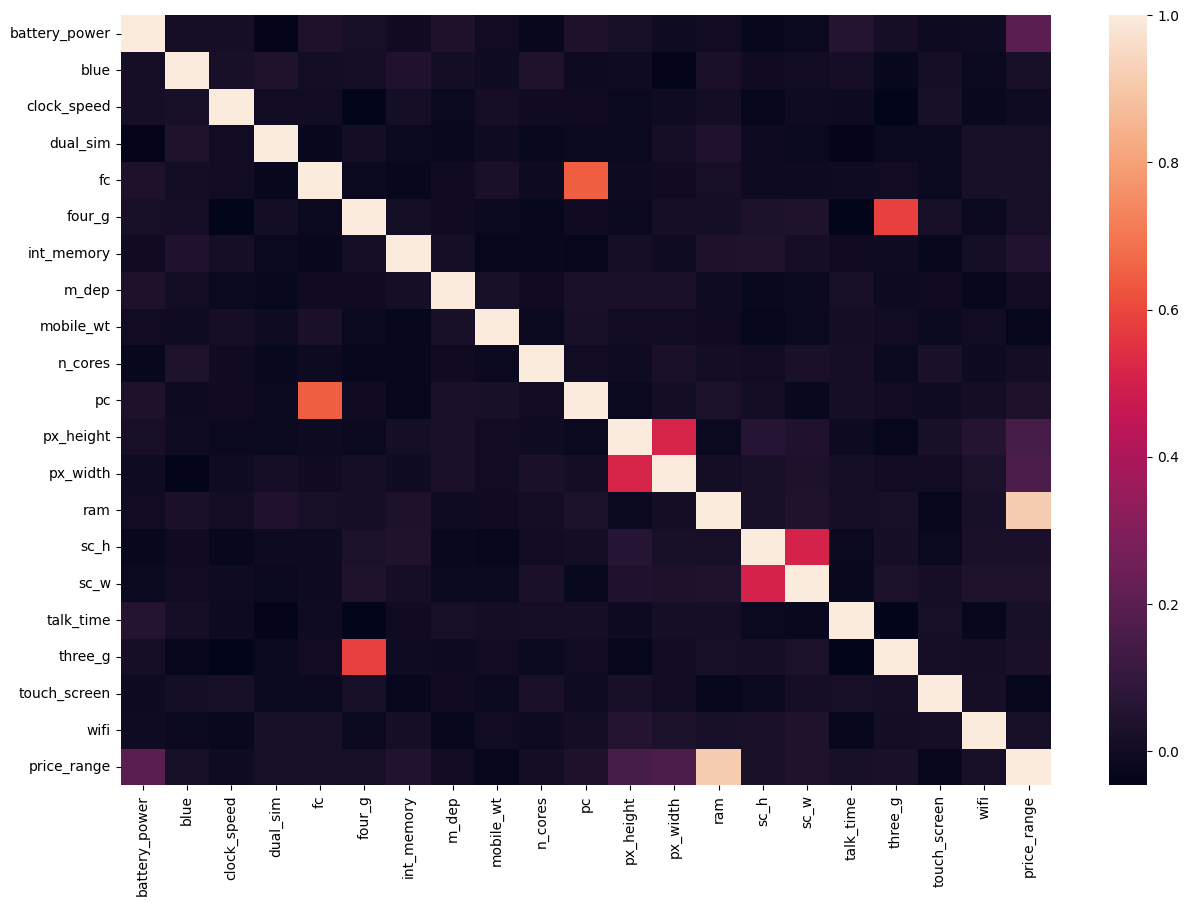

In [69]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr())

In [70]:
df.corr()["price_range"]

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

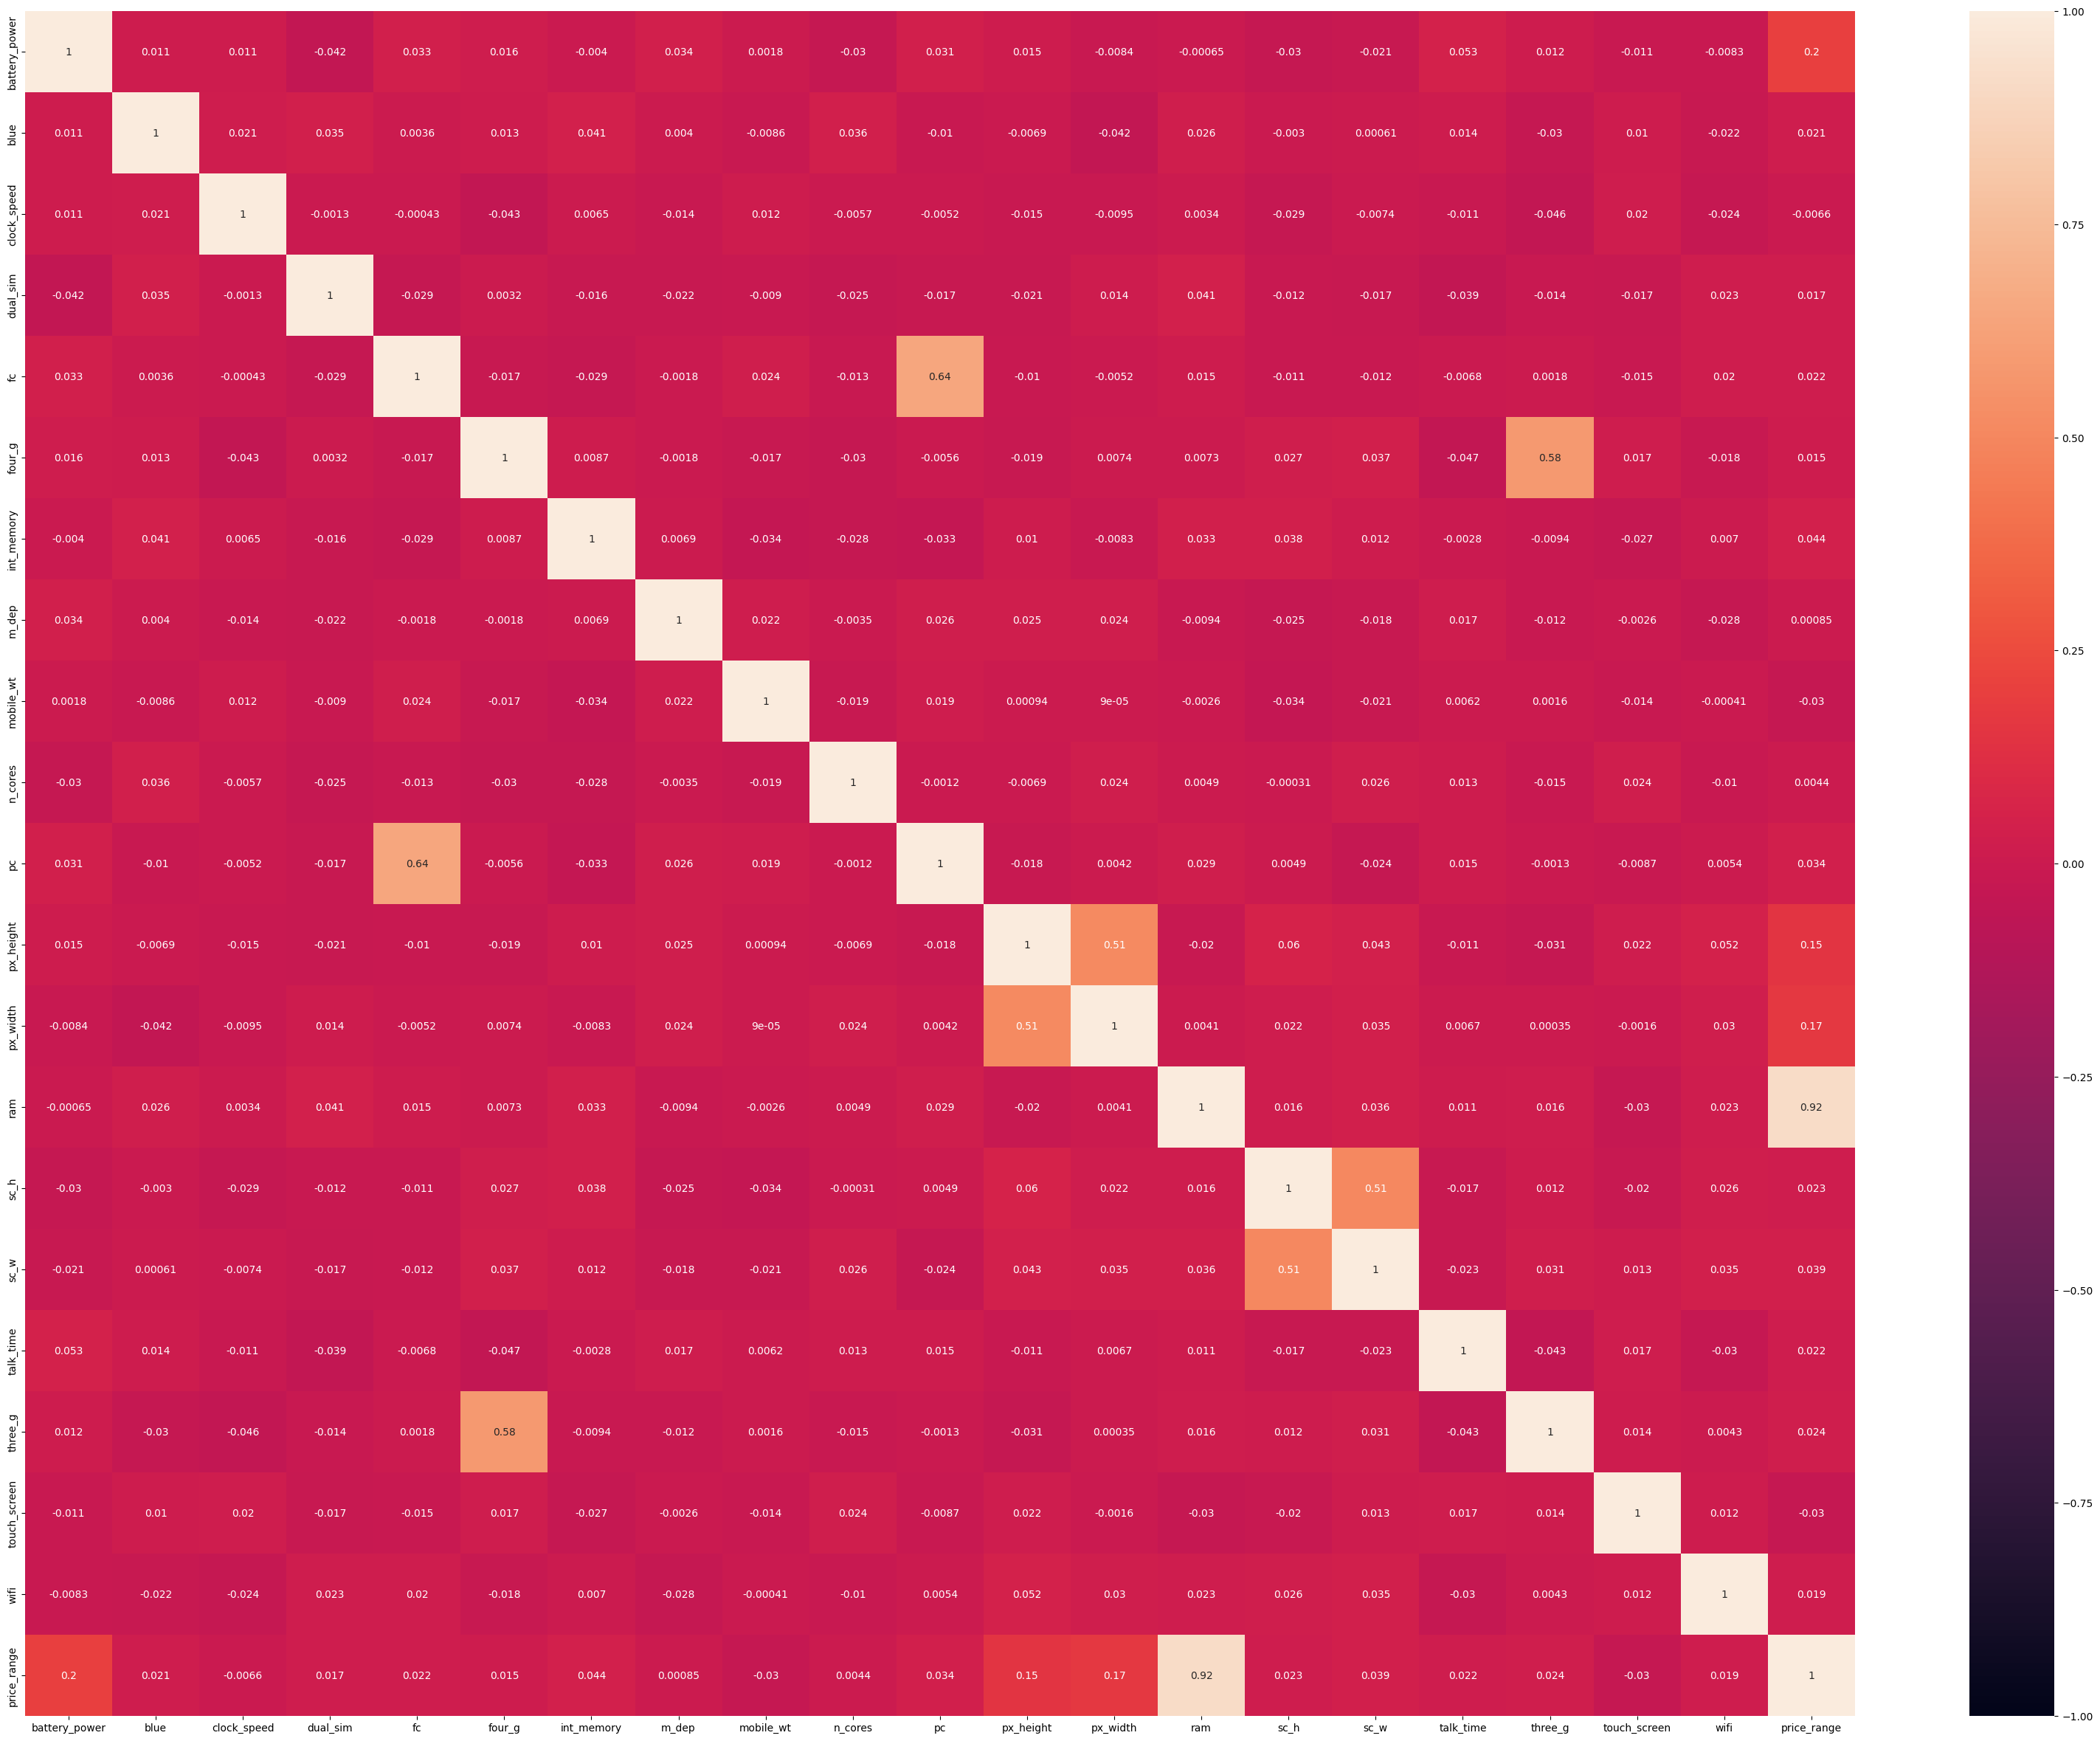

In [71]:
plt.figure(figsize=(40, 30))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()